# 集成学习及随机森林实践-学生版

## 1.利用sklearn自带的手写数字识别数据集，完成以下任务

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
%matplotlib inline
from sklearn import datasets
from matplotlib import pyplot as plt
import tensorflow as tf
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer 
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

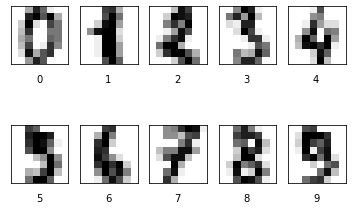

In [3]:
for i in range(1, 11):
        plt.subplot(2, 5, i)  #划分成2行5列
        plt.imshow(digits.data[i - 1].reshape([8, 8]), cmap=plt.cm.gray_r)
        plt.text(3, 10, str(digits.target[i - 1])) #在图片的任意位置添加文本
        plt.xticks([]) #认为设置坐标轴显示的刻度值
        plt.yticks([])
plt.show()

### （1）利用随机森林构建分类模型，并评价模型的效果

In [4]:
from sklearn.metrics import confusion_matrix, classification_report   
from sklearn.preprocessing import LabelBinarizer      #标签二值化

In [5]:
X = digits.data
y = digits.target
X -= X.min()   
X /= X.max()  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [6]:
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [7]:
Y = np.array(y)
Y

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
X_train.shape

(1257, 64)

In [9]:
X_test.shape

(540, 64)

In [10]:
# n_estimators：森林中树的数量
forest = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
forest.score(X_train, y_train)

1.0

In [12]:
score1 = np.mean(cross_val_score(forest,X_train, y_train,cv=5,scoring='accuracy'))
print('平均性能得分：'+str(score1))

平均性能得分：0.9649971542401822


In [13]:
importances = forest.feature_importances_
print("特征重要性：", importances)

特征重要性： [0.00000000e+00 2.40621638e-03 2.13830419e-02 1.04012752e-02
 1.05859599e-02 2.53516257e-02 1.01716000e-02 6.21639448e-04
 3.14677962e-05 9.46830018e-03 2.59762229e-02 6.33191573e-03
 1.33395753e-02 2.73656561e-02 6.60679365e-03 7.58395525e-04
 3.59956359e-05 8.30092004e-03 1.86071173e-02 2.52199517e-02
 2.64856717e-02 4.97924140e-02 1.19889017e-02 2.53252853e-04
 5.57691872e-05 1.18490728e-02 3.87661516e-02 2.70685356e-02
 3.05973552e-02 2.03632139e-02 2.81688612e-02 0.00000000e+00
 0.00000000e+00 2.33617567e-02 3.14555651e-02 1.84376113e-02
 5.18543961e-02 1.59708010e-02 2.57743251e-02 0.00000000e+00
 0.00000000e+00 1.50815331e-02 3.48697817e-02 4.00518459e-02
 1.49496321e-02 1.99350764e-02 2.03448474e-02 2.43729342e-04
 2.36164774e-05 2.95192896e-03 1.73039160e-02 2.08077867e-02
 1.77539739e-02 1.96490044e-02 3.03833717e-02 1.75439027e-03
 0.00000000e+00 1.82753115e-03 2.19206535e-02 1.53242472e-02
 2.26990303e-02 2.52618368e-02 1.80346627e-02 3.62027852e-03]


### （2）尝试使用最大投票法、bagging、adaboost 、stacking等集成学习方法，构建手写数字识别系统，并对不同方法的效果进行评价

####  最大投票法

In [14]:
from sklearn import tree
from sklearn import linear_model 
from sklearn import neighbors

model1=tree.DecisionTreeClassifier(random_state=123)    #决策树分类模型
model2=neighbors.KNeighborsClassifier() #KNN分类模型
model3=RandomForestClassifier(n_estimators=15) #随机森林

In [15]:
#模型训练
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
#预测
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

In [17]:
model1.score(X_test,y_test)

0.8203703703703704

In [18]:
model2.score(X_test,y_test)

0.9777777777777777

In [19]:
model3.score(X_test,y_test)

0.9592592592592593

In [20]:
final_pred = np.array([])
for i in range(0,len(X_test)):
    temp=pd.Series([pred1[i], pred2[i], pred3[i]])
    final_pred =np.append(final_pred,temp.mode()[0])

In [21]:
#最终结果
final_pred

array([1., 1., 5., 5., 5., 2., 7., 1., 7., 0., 0., 9., 9., 4., 1., 4., 9.,
       9., 0., 6., 2., 0., 7., 5., 7., 4., 2., 4., 6., 2., 7., 5., 4., 7.,
       4., 9., 8., 3., 1., 0., 6., 7., 1., 3., 3., 5., 0., 1., 2., 8., 8.,
       5., 2., 0., 9., 0., 1., 7., 2., 5., 6., 4., 3., 9., 5., 5., 1., 1.,
       8., 7., 5., 1., 1., 6., 9., 8., 1., 5., 9., 4., 9., 2., 9., 6., 5.,
       7., 8., 9., 9., 3., 1., 5., 6., 3., 7., 7., 0., 0., 0., 8., 5., 6.,
       6., 6., 4., 1., 9., 2., 1., 1., 2., 5., 2., 6., 6., 9., 5., 6., 1.,
       5., 1., 1., 8., 1., 5., 8., 4., 1., 9., 7., 0., 5., 8., 2., 1., 4.,
       5., 8., 4., 9., 6., 7., 8., 7., 2., 8., 7., 7., 8., 9., 5., 0., 1.,
       6., 4., 2., 3., 2., 4., 7., 6., 3., 9., 3., 3., 5., 0., 4., 4., 4.,
       6., 8., 8., 3., 1., 2., 4., 2., 8., 5., 3., 5., 9., 2., 3., 5., 0.,
       7., 8., 8., 0., 8., 6., 4., 0., 4., 4., 5., 1., 7., 8., 8., 9., 3.,
       0., 5., 3., 2., 3., 3., 4., 7., 9., 3., 5., 5., 1., 1., 7., 6., 0.,
       2., 5., 8., 7., 7.

In [22]:
out=pd.DataFrame({"真实类别":y_test,"最终结果":final_pred,"pred1":pred1,"pred2":pred2,"pred3":pred3})
out

,真实类别,最终结果,pred1,pred2,pred3
0,1,1.0,1,1,1
1,1,1.0,1,1,1
2,5,5.0,5,5,5
3,5,5.0,5,5,5
4,5,5.0,5,5,5
...,...,...,...,...,...
535,0,0.0,0,0,0
536,3,3.0,3,3,3
537,9,9.0,7,9,9
538,9,9.0,9,9,9


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,final_pred) 

0.9703703703703703

In [24]:
from sklearn.ensemble import VotingClassifier
model_final1=VotingClassifier(estimators=[('决策树模型', model1), ('KNN', model2),('随机森林', model3)], voting='hard')

In [25]:
model_final1.fit(X_train, y_train)
final_pred1=model_final1.predict(X_test)

In [26]:
final_pred1

array([1, 1, 5, 5, 5, 2, 7, 1, 7, 0, 0, 9, 9, 4, 1, 4, 9, 9, 0, 6, 2, 0,
       7, 5, 7, 4, 2, 4, 6, 2, 7, 5, 4, 7, 4, 7, 8, 3, 1, 0, 6, 7, 1, 3,
       3, 5, 0, 1, 2, 8, 8, 5, 2, 0, 9, 0, 1, 7, 2, 5, 6, 4, 3, 9, 5, 5,
       1, 1, 8, 7, 5, 1, 1, 6, 9, 8, 1, 5, 9, 4, 9, 2, 9, 6, 5, 7, 8, 9,
       9, 3, 1, 5, 6, 3, 7, 7, 0, 0, 0, 8, 5, 1, 6, 6, 4, 1, 9, 2, 1, 1,
       2, 5, 2, 6, 6, 9, 5, 6, 1, 5, 1, 1, 8, 1, 5, 8, 4, 1, 9, 7, 0, 5,
       8, 2, 1, 4, 5, 8, 4, 9, 6, 7, 8, 7, 2, 8, 7, 7, 8, 9, 4, 0, 1, 6,
       4, 2, 3, 2, 4, 7, 6, 3, 9, 3, 3, 5, 0, 4, 4, 4, 6, 8, 8, 3, 1, 2,
       4, 2, 8, 5, 3, 5, 9, 2, 3, 5, 0, 7, 8, 8, 0, 8, 6, 4, 0, 4, 4, 5,
       1, 7, 8, 8, 9, 3, 0, 5, 3, 2, 3, 3, 4, 7, 9, 3, 5, 5, 1, 1, 7, 6,
       0, 8, 5, 8, 7, 7, 3, 0, 1, 9, 6, 9, 3, 3, 2, 8, 8, 6, 2, 3, 1, 7,
       2, 9, 3, 4, 3, 9, 3, 1, 6, 7, 3, 6, 9, 8, 4, 9, 7, 5, 5, 5, 5, 2,
       3, 3, 8, 9, 1, 9, 9, 7, 7, 7, 0, 1, 0, 2, 3, 3, 8, 2, 0, 2, 2, 2,
       6, 9, 5, 7, 1, 0, 8, 3, 2, 6, 9, 6, 1, 6, 2,

In [27]:
accuracy_score(y_test,final_pred1) 

0.9666666666666667

#### bagging 

In [28]:
from sklearn.ensemble import BaggingClassifier
bagging_model= BaggingClassifier(base_estimator=model1,n_estimators=15)

In [29]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

In [30]:
bagging_model.score(X_test,y_test)

0.9185185185185185

#### adaboost

In [31]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model=AdaBoostClassifier(base_estimator=model1,n_estimators=15)

In [32]:
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [33]:
adaboost_model.score(X_test,y_test)

0.8148148148148148

#### stacking

In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
stacking_model= StackingClassifier(estimators=[('决策树模型', model1), ('KNN', model2),('随机森林', model3)], 
                                   final_estimator=LogisticRegression(max_iter=10000))

In [35]:
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('决策树模型',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                  

In [36]:
stacking_model.score(X_train, y_train)

1.0

### （3）三人一组，完成手写识别的分析报告

## 利用随机森林的方法填补泰坦尼克号数据的的缺失值

### 导入数据 

In [37]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
390,1,1,male,36.0,1,2,120.0000,S,First,man,True,B,Southampton,yes,False
367,1,3,female,NaN,0,0,7.2292,C,Third,woman,False,NaN,Cherbourg,yes,True
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
651,1,2,female,18.0,0,1,23.0000,S,Second,woman,False,NaN,Southampton,yes,False
462,0,1,male,47.0,0,0,38.5000,S,First,man,True,E,Southampton,no,True


### 查看缺失情况 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [39]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 随机森林填补缺失值 

In [40]:
df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [41]:
#更改分类变量对应的值
df.loc[df['sex']=='male','sex']=0
df.loc[df['sex']=='female','sex']=1

#同理，更改embarked对应的值
df.loc[df['embarked']=='S','embarked']=0
df.loc[df['embarked']=='C','embarked']=1
df.loc[df['embarked']=='Q','embarked']=2

#### 填补age 

In [42]:
#使用随机森林对缺失值进行预测填充
from sklearn.ensemble import RandomForestRegressor

#把要填充的特征和其他无缺失的特征取出，这里先处理x_num_0特征
qs_columns=['age'] #有缺失的列名
for i in range(len(qs_columns)):
    data3_add=df[qs_columns[i]]
    data3=df[['survived','pclass','sex','sibsp','parch','fare']]
    data3.insert(0,qs_columns[i],data3_add)

    #成缺失值和非缺失值两部分，分别作为训练集和测试集
    know=data3[data3[qs_columns[i]].notnull()].values
    unknow=data3[data3[qs_columns[i]].isnull()].values

    #获取训练集特征和结果标签
    X=know[:,1:] #训练集特征
    y=know[:,0]  #训练集的结果标签

    #利用上面构建的训练集训练随机森林回归模型
    RF_clf=RandomForestRegressor(random_state=0,n_estimators=200,n_jobs=-1)
    RF_clf.fit(X,y)

    #用得到的模型对年龄位置的样本进行预测
    y_predicted=RF_clf.predict(unknow[:,1:])

    #用得到的预测结果填补原缺失数据
    df.loc[(data3[qs_columns[i]].isnull()),qs_columns[i]]=y_predicted

In [43]:
df.isnull().sum() 

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### 填补embarked

In [44]:
from  sklearn.ensemble import RandomForestClassifier
#把要填充的特征和其他无缺失的特征取出，这里先处理x_num_0特征
qs_columns1=['embarked','deck','embark_town'] #有缺失的列名

te=df[df['embarked'].notnull()]#非空的embarked对应的行
te_X=te[['survived','pclass','sex','sibsp','parch','fare']]#设定输入的X
te_Y=te[['embarked']]#设定输入的Y
te_X=te_X.astype(float)#转换数据类型，不转换成数值型的，到后面输入模型会报错。
te_Y=te_Y.astype(float)#转换数据类型，不转换成数值型的，到后面输入模型会报错。
tr=df[df['embarked'].isnull()]

tr_X=tr[['survived','pclass','sex','sibsp','parch','fare']].astype(float)
tr_Y=tr['embarked'].astype(float)
fc=RandomForestClassifier()
fc.fit(te_X,te_Y)
pr=fc.predict(tr_X)

E:\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [45]:
df.loc[(df[qs_columns1[i]].isnull()),qs_columns1[i]]=pr

In [46]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### 填补embark_town

In [49]:
df['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [50]:
df.loc[df['embark_town']=='Southampton','embark_town']=0
df.loc[df['embark_town']=='Cherbourg','embark_town']=1
df.loc[df['embark_town']=='Queenstown','embark_town']=2

te_embark_town=df[df['embark_town'].notnull()]
te_embark_town_X=te_embark_town[['survived','pclass','sex','sibsp','parch','fare']]#设定输入的X
te_embark_town_Y=te_embark_town[['embark_town']]#设定输入的Y
te_embark_town_X=te_embark_town_X.astype(float)#转换数据类型，不转换成数值型的，到后面输入模型会报错。
te_embark_town_Y=te_embark_town_Y.astype(float)#转换数据类型，不转换成数值型的，到后面输入模型会报错。
tr_embark_town=df[df['embark_town'].isnull()]

tr_embark_town_X=tr_embark_town[['survived','pclass','sex','sibsp','parch','fare']].astype(float)
tr_embark_town_Y=tr_embark_town['embark_town'].astype(float)
fc_embark_town=RandomForestClassifier()
fc_embark_town.fit(te_embark_town_X,te_embark_town_Y)
pr_embark_town=fc_embark_town.predict(tr_embark_town_X)

E:\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [51]:
qs_columns3=['embark_town'] 
df.loc[(df[qs_columns3[i]].isnull()),qs_columns3[i]]=pr_embark_town

In [52]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

## （选择题）对决策树实践作业的中表情识别模型进行改进，以提高模型的准确率

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df=pd.read_csv("F:/大三（上）/机器学习/决策树参考代码/决策树参考代码/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [55]:
pixels = df.loc[:,'pixels'].values

print(pixels.shape)
print(type(pixels))

(35887,)
<class 'numpy.ndarray'>


In [56]:
px = []
for x in pixels : 
    x = x.split(" ")
    x = [float(t) for t in x]
    px.append(x)

In [57]:
x = np.array(px)
print(x.shape)

(35887, 2304)


In [67]:
x

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [58]:
y = df.loc[:, 'emotion'].values
print(y.shape)
print(type(y))

(35887,)
<class 'numpy.ndarray'>


In [68]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=int64)

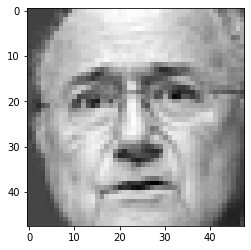

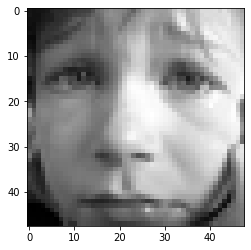

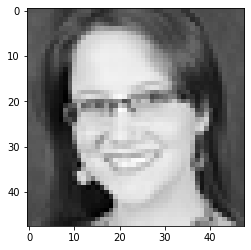

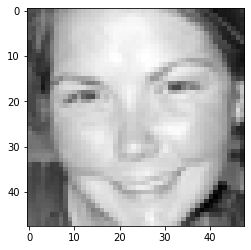

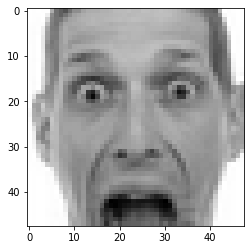

In [59]:
for ix in range(5,10):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
    plt.show()

In [60]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)

In [61]:
#模型训练
model1.fit(Xtrain,Ytrain)
model2.fit(Xtrain,Ytrain)
model3.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
#预测
pred4=model1.predict(Xtest)
pred5=model2.predict(Xtest)
pred6=model3.predict(Xtest)

In [63]:
model1.score(Xtest,Ytest)

0.3071421937401319

In [64]:
model2.score(Xtest,Ytest)

0.32878239063806075

In [65]:
model3.score(Xtest,Ytest)

0.3786570075229869

In [69]:
final_pred1 = np.array([])
for i in range(0,len(Xtest)):
    temp=pd.Series([pred4[i], pred5[i], pred6[i]])
    final_pred1 =np.append(final_pred1,temp.mode()[0])

In [70]:
#最终结果
final_pred1

array([6., 3., 0., ..., 3., 3., 2.])

In [71]:
out1=pd.DataFrame({"真实类别":Ytest,"最终结果":final_pred1,"pred4":pred4,"pred5":pred5,"pred6":pred6})
out1

,真实类别,最终结果,pred4,pred5,pred6
0,6,6.0,6,6,6
1,3,3.0,5,3,3
2,5,0.0,2,5,0
3,3,3.0,5,3,3
4,2,0.0,3,2,0
...,...,...,...,...,...
10762,3,0.0,0,6,2
10763,4,0.0,0,3,0
10764,3,3.0,3,3,3
10765,4,3.0,3,3,4


In [72]:
accuracy_score(Ytest,final_pred1) 

0.36491130305563296